## 安裝 Pandas DataReader

In [1]:
! pip install pandas-datareader

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


## 讀取 Google 股價

In [3]:
import pandas_datareader
df = pandas_datareader.get_data_yahoo('goog')

Populating the interactive namespace from numpy and matplotlib


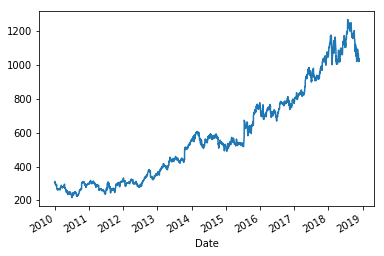

In [6]:
% pylab inline
df['Close'].plot(kind = 'line')

In [8]:
df.count()

High         2241
Low          2241
Open         2241
Close        2241
Volume       2241
Adj Close    2241
dtype: int64

In [10]:
2241 * 0.7

1568.6999999999998

In [11]:
trainset = df.iloc[0:1570,:]
testset  = df.iloc[1570: ,:]

In [15]:
training_set = trainset.iloc[:,3:4].values

In [20]:
#training_set

In [17]:
test_set = testset.iloc[:,3:4].values

In [19]:
#test_set

## 資料標準化

In [21]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [23]:
training_set

array([[307.98684692],
       [311.34997559],
       [309.97888184],
       ...,
       [735.29998779],
       [733.5300293 ],
       [744.77001953]])

In [24]:
training_set_scaled

array([[0.16315187],
       [0.16915774],
       [0.16670924],
       ...,
       [0.92624659],
       [0.9230858 ],
       [0.94315815]])

In [25]:
len(training_set_scaled)

1570

## 建立特徵X與目標y

In [26]:
import numpy as np

X_train = []
y_train = []

for i in range(60, 1570):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i,0])


In [28]:
X_train[0]

array([0.16315187, 0.16915774, 0.16670924, 0.1527547 , 0.14019297,
       0.14721905, 0.14641177, 0.13698156, 0.13397418, 0.13642268,
       0.12768444, 0.13444439, 0.12804816, 0.13032809, 0.10107944,
       0.09219929, 0.09434613, 0.09406225, 0.08713379, 0.08327477,
       0.08600715, 0.08432162, 0.09292673, 0.08047143, 0.08447242,
       0.08640634, 0.08904112, 0.08727575, 0.08900564, 0.08609587,
       0.09335258, 0.09061132, 0.09505586, 0.09287354, 0.09468326,
       0.08782575, 0.0846321 , 0.08016096, 0.0804892 , 0.08571438,
       0.09313965, 0.09691883, 0.1051425 , 0.11367671, 0.11214198,
       0.11011045, 0.12453515, 0.12869576, 0.12727635, 0.11276293,
       0.11455494, 0.1148743 , 0.11561951, 0.10994189, 0.10772408,
       0.10018344, 0.10757323, 0.11249682, 0.11232826, 0.11211533])

In [29]:
y_train[0]

0.11589451009798751

In [30]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [31]:
X_train.shape

(1510, 60)

In [32]:
y_train.shape

(1510,)

In [33]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [35]:
X_train.shape

(1510, 60, 1)

In [36]:
X_train.shape[1], 1

(60, 1)

## 建構LSTM模型

In [37]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True)) 
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True)) 
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

C:\ProgramData\Anaconda3_2\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## 訓練模型

In [38]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1510/1510 [==============================] - 6s 4ms/step - loss: 0.0299
Epoch 2/100
1510/1510 [==============================] - 4s 2ms/step - loss: 0.0040
Epoch 3/100
1510/1510 [==============================] - 4s 2ms/step - loss: 0.0037
Epoch 4/100
1510/1510 [==============================] - 4s 2ms/step - loss: 0.0035
Epoch 5/100
1510/1510 [==============================] - 4s 2ms/step - loss: 0.0028
Epoch 6/100
1510/1510 [==============================] - 4s 3ms/step - loss: 0.0030
Epoch 7/100
1510/1510 [==============================] - 4s 2ms/step - loss: 0.0034
Epoch 8/100
1510/1510 [==============================] - 4s 2ms/step - loss: 0.0033
Epoch 9/100
1510/1510 [==============================] - 4s 2ms/step - loss: 0.0028
Epoch 10/100
1510/1510 [==============================] - 4s 2ms/step - loss: 0.0028
Epoch 11/100
1510/1510 [==============================] - 4s 2ms/step - loss: 0.0028
Epoch 12/100
1510/1510 [==============================] - 4s 3ms/step - lo

1510/1510 [==============================] - 4s 2ms/step - loss: 0.0011
Epoch 98/100
1510/1510 [==============================] - 4s 2ms/step - loss: 9.9985e-04
Epoch 99/100
1510/1510 [==============================] - 4s 2ms/step - loss: 0.0011
Epoch 100/100
1510/1510 [==============================] - 4s 2ms/step - loss: 9.7379e-04


In [41]:
#X_train

In [42]:
predicted = regressor.predict(X_train)

In [43]:
predicted

array([[0.11475463],
       [0.116954  ],
       [0.1187714 ],
       ...,
       [0.90822864],
       [0.906258  ],
       [0.90378845]], dtype=float32)

## 反標準化預測結果

In [45]:
predicted_stock_price = sc.inverse_transform(predicted)

In [48]:
training_set.shape, predicted_stock_price.shape

((1570, 1), (1510, 1))

In [50]:
training_set[60:].shape

(1510, 1)

## 對照預測結果與實際結果

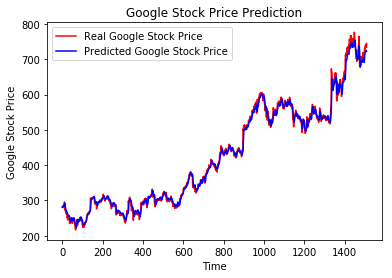

In [51]:
import matplotlib.pyplot as plt
plt.plot(training_set[60:], color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [53]:
training_set[60:][0],predicted_stock_price[0]

(array([281.5239563]), array([280.88565], dtype=float32))

In [55]:
real_data      = training_set[60:].flatten()
predicted_data = predicted_stock_price.flatten()

In [60]:
import numpy as np
(np.abs((real_data - predicted_data) / predicted_data)).mean()

0.017293337609240282

## 評估測試資料集

In [62]:
test_set.shape

(671, 1)

In [63]:
inputs = sc.transform(test_set)

In [65]:
len(inputs)

671

In [66]:
X_test = []
for i in range(60, 671):
    X_test.append(inputs[i-60:i, 0])

In [68]:
X_test = np.array(X_test)
X_test.shape

(611, 60)

In [69]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(611, 60, 1)

In [70]:
test_predicted = regressor.predict(X_test)

In [72]:
test_predicted_stock_price = sc.inverse_transform(test_predicted)

In [74]:
#test_predicted_stock_price

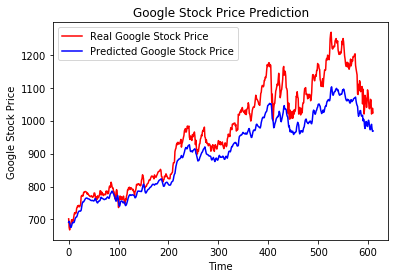

In [75]:
import matplotlib.pyplot as plt
plt.plot(test_set[60:], color = 'red', label = 'Real Google Stock Price')
plt.plot(test_predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()